In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set(style="whitegrid")
%matplotlib inline
from pandas import DataFrame, Series
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

The file had to be cleaned up before using it on MacOS

- ```dos2unix airline_tweets.csv```
- ```sed -i 's/,$//' airline_tweets.csv```

After that we can move forward and import it in Pandas

In [2]:
df = pd.read_csv('airline_tweets.csv', encoding = 'utf8')
df.dtypes

tweet_id            int64
tweet_created      object
name               object
tweet_location     object
retweet_count     float64
text               object
dtype: object

In [3]:
df.sample(5)

,tweet_id,tweet_created,name,tweet_location,retweet_count,text
12099,12100,23-2-2015 13:37,AnnaIntheCity,Northern Virginia,0.0,@AmericanAir that's why I'm asking for excepti...
10434,10435,23-2-2015 4:15,Gamerguy212,New York City,0.0,@AmericanAir I Love American Airlines :D
7970,7971,22-2-2015 11:14,RichardAWeber,NaN,0.0,@SouthwestAir think you have great people work...
6298,6299,21-2-2015 13:10,Lozano_dc,NaN,0.0,@SouthwestAir don't you think a 4hr wait time ...
5953,5954,NaN,D4Duskes,NaN,0.0,@united on final. Pls don't let my connection ...


In [4]:
df.sample(5)['tweet_location'].isnull().sum()

2

In [5]:
df['retweet_count'].describe().transpose()

count    14608.000000
mean         0.082694
std          0.746508
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: retweet_count, dtype: float64

## Starting to clean up the data

Converting all text to lower case and removing the characters the english disctionary does not have. This takes away  the some of the data. We need to remove extra characters like # from the hashtags unless we would like to do an explicit hashtag analyzis.

In case you would like to use non ascii characters in the text  http://stackoverflow.com/a/35723460/127508

- converting text to lowercase
- unicode -> str
- removing # (and potentiall other special characters)



In [6]:
df.count()

tweet_id          14616
tweet_created     14470
name              14616
tweet_location     9803
retweet_count     14608
text              14608
dtype: int64

In [7]:
#Lambdas for cleaning up 
df.count()
asci = lambda s: s.encode('ascii',errors='ignore') if isinstance(s, basestring) else s
lowe = lambda s: s.lower() if isinstance(s, basestring) else s
typ = lambda t: type(t)
df['lower'] = df['text'].apply(lowe)
df['ascii'] = df['lower'].apply(asci)
df.head()

,tweet_id,tweet_created,name,tweet_location,retweet_count,text,lower,ascii
0,1,16-2-2015 23:36,JetBlueNews,USA,0.0,@JetBlue's new CEO seeks the right balance to ...,@jetblue's new ceo seeks the right balance to ...,@jetblue's new ceo seeks the right balance to ...
1,2,16-2-2015 23:43,nesi_1992,undecided,0.0,@JetBlue is REALLY getting on my nerves !! 😡�...,@jetblue is really getting on my nerves !! 😡�...,@jetblue is really getting on my nerves !! #n...
2,3,16-2-2015 23:48,CPoutloud,Washington. DC,0.0,@united yes. We waited in line for almost an h...,@united yes. we waited in line for almost an h...,@united yes. we waited in line for almost an h...
3,4,16-2-2015 23:52,brenduch,NaN,0.0,@united the we got into the gate at IAH on tim...,@united the we got into the gate at iah on tim...,@united the we got into the gate at iah on tim...
4,5,17-2-2015 0:00,VahidESQ,Los Angeles. CA,0.0,@SouthwestAir its cool that my bags take a bit...,@southwestair its cool that my bags take a bit...,@southwestair its cool that my bags take a bit...


In [8]:
df[df['text'].isnull()].count()

tweet_id          8
tweet_created     0
name              8
tweet_location    0
retweet_count     0
text              0
lower             0
ascii             0
dtype: int64

In [9]:
df[df['text'].isnull()]

,tweet_id,tweet_created,name,tweet_location,retweet_count,text,lower,ascii
678,679,NaN,scatignani,NaN,NaN,NaN,NaN,NaN
2282,2283,NaN,edgarsantana,NaN,NaN,NaN,NaN,NaN
4027,4028,NaN,Mosborne13,NaN,NaN,NaN,NaN,NaN
4199,4200,NaN,ConnieBowman4,NaN,NaN,NaN,NaN,NaN
5628,5629,NaN,ohmal,NaN,NaN,NaN,NaN,NaN
7290,7291,NaN,traceyabbywhite,NaN,NaN,NaN,NaN,NaN
10568,10569,NaN,MrEschatologist,NaN,NaN,NaN,NaN,NaN
13290,13291,NaN,Pride_MMA,NaN,NaN,NaN,NaN,NaN


In [10]:
df.count()

tweet_id          14616
tweet_created     14470
name              14616
tweet_location     9803
retweet_count     14608
text              14608
lower             14608
ascii             14608
dtype: int64

In [11]:
df = df[(df.text.notnull())]
df['text'].isnull().count()

14608

In [12]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,text,lower,ascii
8094,8095,22-2-2015 12:15,iambmac,Columbus. OH. USA,0.0,@AmericanAir DMing you now! Big thanks.,@americanair dming you now! big thanks.,@americanair dming you now! big thanks.


In [13]:
#Removing what we don't need
for column in ['lower', 'text']:
    if column in df.columns:
        del df[column]
df.count()

tweet_id          14608
tweet_created     14470
name              14608
tweet_location     9803
retweet_count     14608
ascii             14608
dtype: int64

In [14]:
df.head()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii
0,1,16-2-2015 23:36,JetBlueNews,USA,0.0,@jetblue's new ceo seeks the right balance to ...
1,2,16-2-2015 23:43,nesi_1992,undecided,0.0,@jetblue is really getting on my nerves !! #n...
2,3,16-2-2015 23:48,CPoutloud,Washington. DC,0.0,@united yes. we waited in line for almost an h...
3,4,16-2-2015 23:52,brenduch,NaN,0.0,@united the we got into the gate at iah on tim...
4,5,17-2-2015 0:00,VahidESQ,Los Angeles. CA,0.0,@southwestair its cool that my bags take a bit...


## Getting airline information

In [15]:
df['airline'] = df['ascii'].str.extract('@(?P<Airline>\w+)', expand=True)
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,airline
14331,14332,24-2-2015 10:27,jkordyback,North Saanich. BC,0.0,@americanair inconvenient is such a convenient...,americanair


In [16]:
df['airline'].value_counts()

united             3800
usairways          2902
americanair        2748
southwestair       2414
jetblue            2212
virginamerica       503
nrhodes85             2
dadboner              1
deltaassist           1
catfoodbeerglue       1
scm1133               1
lindaswc              1
djevolutionhd         1
vanessaannz           1
ods1819               1
chasefoster           1
sb5551                1
eatgregeat            1
imaginedragons        1
sarahpompei           1
nytimes               1
kciairport            1
shannonwoodward       1
internjohnradio       1
albertbreer           1
mandarinjourney       1
timbennettg3          1
ninadavuluri          1
hillaconlin           1
andrewfallis          1
malhoit               1
melissaafrancis       1
Name: airline, dtype: int64

In [17]:
df['airline_clean'] = df['airline'].str.extract(
    '(usairways|americanair|jetblue|virginamerica|united|usairways|southwestair)', 
    expand=True)
df['airline_clean'].value_counts()

united           3800
usairways        2902
americanair      2748
southwestair     2414
jetblue          2212
virginamerica     503
Name: airline_clean, dtype: int64

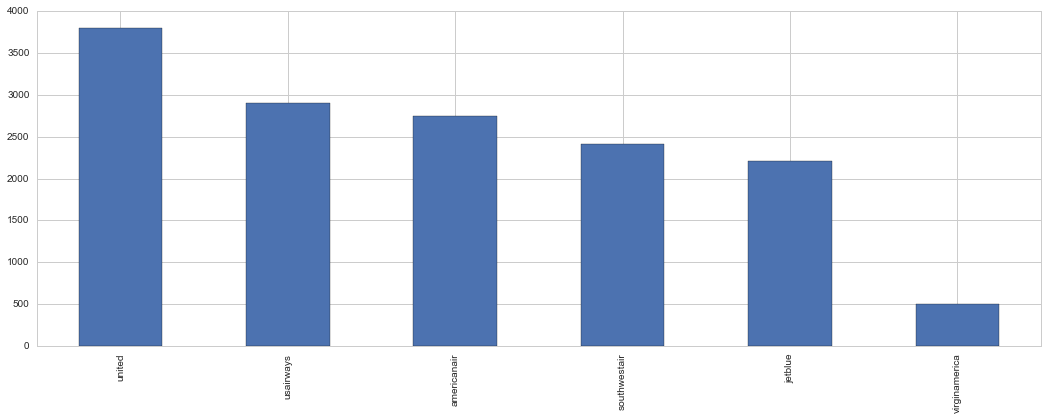

In [18]:
df['airline_clean'].value_counts().plot(kind='bar', stacked=True,figsize=(18,6))

In [19]:
if 'airline' in df.columns:
    del df['airline']  
df['airline_clean'].unique()

array(['jetblue', 'united', 'southwestair', 'usairways', 'virginamerica',
       nan, 'americanair'], dtype=object)

In [20]:
df.head()
df.count()

tweet_id          14608
tweet_created     14470
name              14608
tweet_location     9803
retweet_count     14608
ascii             14608
airline_clean     14579
dtype: int64

In [21]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,airline_clean
12850,12851,23-2-2015 19:12,jenmedbery,New Orleans. LA. USA,0.0,@southwestair twitter cust svc rule 1 dont say...,southwestair


Removing @words move hashtags into a new column.

In [22]:
tags = lambda s: [tag.strip("#") for tag in s.split() if tag.startswith("#")]
df['tags'] = df['ascii'].apply(tags)
df.iloc[1010]

tweet_id                                                       1012
tweet_created                                       17-2-2015 16:46
name                                                AshleyMarie_TIU
tweet_location                                        HOOSiER STATE
retweet_count                                                     0
ascii             @southwestair what's up with these delays?! th...
airline_clean                                          southwestair
tags                                 [southwest, southwestairlines]
Name: 1011, dtype: object

In [23]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,airline_clean,tags
10882,10883,23-2-2015 7:38,JatinPonia,NaN,0.0,@americanair please follow me.,americanair,[]


In [24]:
urls = lambda s: [url for url in s.split() if url.startswith("http://")]
df['urls'] = df['ascii'].apply(urls)
df.iloc[521]

tweet_id                                                        522
tweet_created                                       17-2-2015 12:03
name                                                somekidnamedjon
tweet_location                                                 ✈️✈️
retweet_count                                                     0
ascii             @jetblue i would love for you to fly my best f...
airline_clean                                               jetblue
tags                                                             []
urls                                       [http://t.co/ch0nmjymgh]
Name: 521, dtype: object

In [25]:
df['ascii'] = df['ascii'].str.replace('(\.)?@(?P<Airline>\w+)', '')
df['ascii'] = df['ascii'].str.replace('#(?P<Tag>\w+)', '')
df['ascii'] = df['ascii'].str.replace('http://t.co/(?P<Url>\w+)', '')
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,airline_clean,tags,urls
8534,8535,22-2-2015 14:11,kirsten_lana,Boston. MA,0.0,just sent it,southwestair,[],[]


In [26]:
df.iloc[521]

tweet_id                                                        522
tweet_created                                       17-2-2015 12:03
name                                                somekidnamedjon
tweet_location                                                 ✈️✈️
retweet_count                                                     0
ascii              i would love for you to fly my best friend ho...
airline_clean                                               jetblue
tags                                                             []
urls                                       [http://t.co/ch0nmjymgh]
Name: 521, dtype: object

In [27]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,airline_clean,tags,urls
7061,7062,21-2-2015 21:26,WM_j_MW,Wake Forest. NC,0.0,suck,united,[],[]


In [28]:
from nltk.corpus import stopwords
import string
stop = stopwords.words('english')
df['ascii'].apply(lambda s: [item for item in s if item not in stop])
df['ascii'].apply(lambda s: s.translate(None, string.punctuation))
df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['ascii'].encode('ascii','ignore')), axis=1)

In [29]:
df.iloc[4424]

tweet_id                       4429
tweet_created        20-2-2015 7:56
name                  KBeckwithDane
tweet_location                  NaN
retweet_count                     0
ascii                 290 to boston
airline_clean               jetblue
tags                             []
urls                             []
tokenized_text    [290, to, boston]
Name: 4428, dtype: object

In [32]:
df.iloc[521]

tweet_id                                                        522
tweet_created                                       17-2-2015 12:03
name                                                somekidnamedjon
tweet_location                                                 ✈️✈️
retweet_count                                                     0
ascii              i would love for you to fly my best friend ho...
airline_clean                                               jetblue
tags                                                             []
urls                                       [http://t.co/ch0nmjymgh]
tokenized_text    [i, would, love, for, you, to, fly, my, best, ...
Name: 521, dtype: object

In [41]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,airline_clean,tags,urls,tokenized_text
1727,1728,18-2-2015 8:19,DeltaSegmentFly,TRI CITIES (TRI),0.0,goes to court to gain access to gates at lo...,southwestair,[deltanews],[http://t.co/ilqzmmjiyq],"[goes, to, court, to, gain, access, to, gates,..."


## Tweets with most hashtags

In [68]:
df['ctags'] = df['tags'].apply(len)

In [79]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,airline_clean,tags,urls,tokenized_text,ctags
9393,9394,22-2-2015 17:42,ubanks,Philly Yo,0.0,any idea when flight 703 to miami will leave ...,usairways,[],[],"[any, idea, when, flight, 703, to, miami, will...",0


Sorting by count

In [92]:
df.sort_values(by='ctags').tail(3)

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,airline_clean,tags,urls,tokenized_text,ctags
4839,4840,20-2-2015 11:57,southxnortheast,key west to bar harbor,2.0,saving my sanity. leaving it behind for sunsh...,jetblue,"[escape, fl, bliss, travel, indenial, whatfroz...",[http://t.co/6ttzejv3hy],"[saving, my, sanity, ., leaving, it, behind, f...",6
8163,8164,22-2-2015 12:35,livingfitly,Washington. DC,0.0,home to in' back to !,virginamerica,"[flight, dc, sunset, globe, backtowinter, work...",[http://t.co/vx9vbctdlf],"[home, to, in, ', back, to, !]",7
4416,4417,20-2-2015 7:49,SMHillman,New York. NY,0.0,gr8 crew on 123 to they're,jetblue,"[mint, flight, lax, mintalicious, truebluelove...",[],"[gr8, crew, on, 123, to, they, 're]",8


In [124]:
tt = df[df['ctags'] != 0]
ll = tt.tags.values.tolist()
llt = [item for sublist in ll for item in sublist]
newl = filter(lambda x: len(x)>0, llt) 


In [129]:
from collections import Counter
c = Counter(newl)
c.most_common(10)

[('destinationdragons', 76),
 ('fail', 63),
 ('jetblue', 43),
 ('unitedairlines', 43),
 ('customerservice', 34),
 ('usairways', 30),
 ('neveragain', 26),
 ('usairwaysfail', 26),
 ('united', 25),
 ('americanairlines', 24)]

Todo:
 - clean up tags (remove non a-z)
 - top most tags by airline
 - sentiment analysis